In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# position
- position X เคลื่อนที่ไปข้างหน้า เป็น (+) และเคลื่อนที่ไปข้างหลัง เป็น (-)
- position Y เคลื่อนที่ไปทางขวา เป็น (+) และเคลื่อนที่ไปทางซ้าย เป็น (-)
- position Z ถ้าขึ้นไป เป็น (+) และถ้าลงไป เป็น (-)

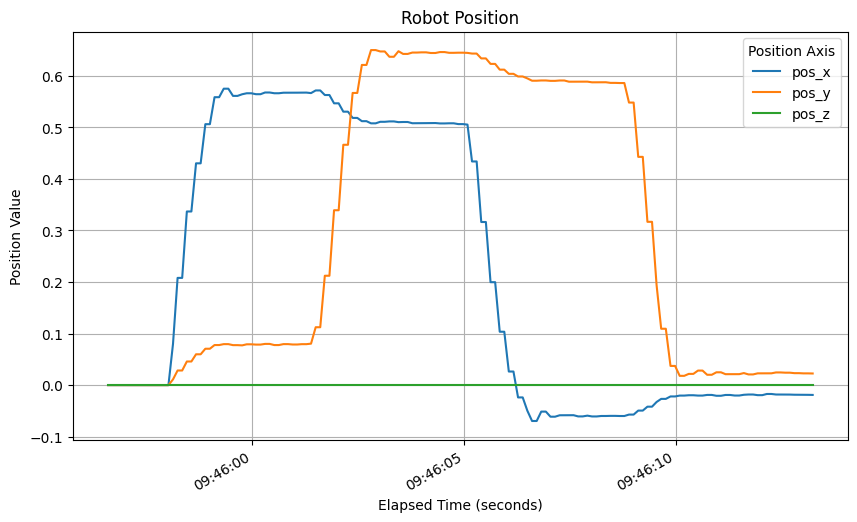

In [2]:
df = pd.read_csv("robot_full_data.csv")

df['timestamp'] = pd.to_datetime(df['timestamp'])
position_cols = ['pos_x', 'pos_y', 'pos_z']

plt.figure(figsize=(10, 6))
df.plot(x='timestamp', y=position_cols, ax=plt.gca())
plt.title('Robot Position')
plt.xlabel('Elapsed Time (seconds)')
plt.ylabel('Position Value')
plt.grid(True)
plt.legend(title='Position Axis')
plt.show()

# attitude
- att_yaw การหันซ้าย-ขวา ค่าเป็น (+) หันไปทางขวา ค่าเป็น (-) หันไปทางซ้าย
- att_pitch เอียงหน้า-หลัง ค่าเป็น (+) เอียงไปข้างหน้า ค่าเป็น (-) เอียงไปข้างหลัง
- att_roll เอียงซ้าย-ขวา ค่าเป็น (+) เอียงไปทางขวา ค่าเป็น (-) เอียงไปทางซ้าย

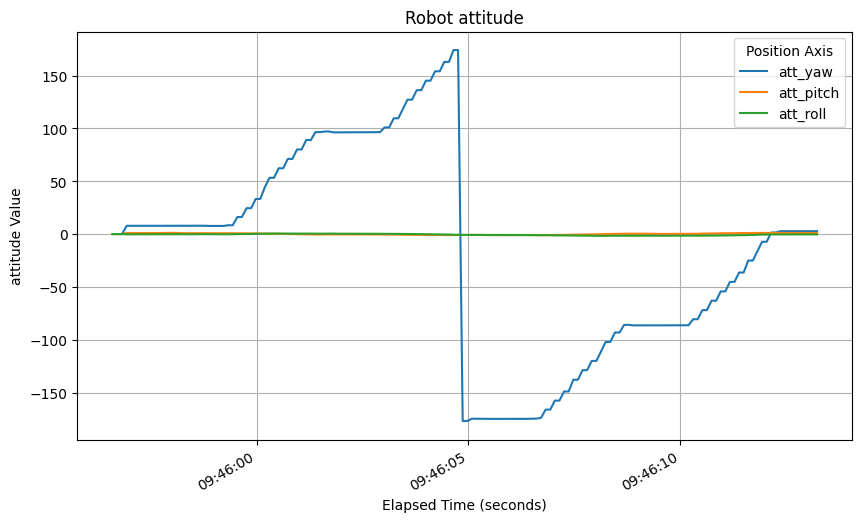

In [3]:
attitude_cols = ['att_yaw', 'att_pitch', 'att_roll']
plt.figure(figsize=(10, 6))
df.plot(x='timestamp', y=attitude_cols, ax=plt.gca())
plt.title('Robot attitude')
plt.xlabel('Elapsed Time (seconds)')
plt.ylabel('attitude Value')
plt.grid(True)
plt.legend(title='Position Axis')
plt.show()

# imu acc
- imu_acc_x อัตราเร่งในแนว หน้า-หลัง ถ้า (+) หน้า ถ้าลบ (-) หลัง
- imu_acc_y อัตราเร่งในแนว ซ้าย-ขวา ถ้า (+) ขวา ถ้าลบ (-) ซ้าย
- imu_acc_z อัตราเร่งในแนว บน-ล่าง ถ้า (+) บน ถ้าลบ (-) ล่าง

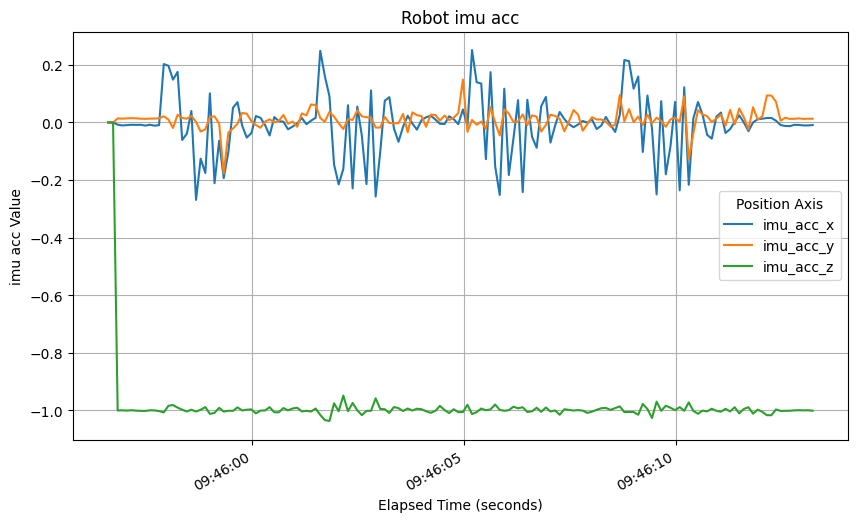

In [4]:
imu_acc_cols = ['imu_acc_x', 'imu_acc_y', 'imu_acc_z']
plt.figure(figsize=(10, 6))
df.plot(x='timestamp', y=imu_acc_cols, ax=plt.gca())
plt.title('Robot imu acc')
plt.xlabel('Elapsed Time (seconds)')
plt.ylabel('imu acc Value')
plt.grid(True)
plt.legend(title='Position Axis')
plt.show()

# imu gyro
- imu_gyro_x อัตราการหมุนที่วิ่งจากหน้าไปหลัง ถ้า (+) หน้า ถ้าลบ (-) หลัง
- imu_gyro_y อัตราการหมุนจากซ้ายไปขวา ถ้า (+) ขวา ถ้าลบ (-) ซ้าย
- imu_gyro_z  อัตราการหมุนจากบนลงล่าง  ถ้า (+) บน ถ้าลบ (-) ล่าง

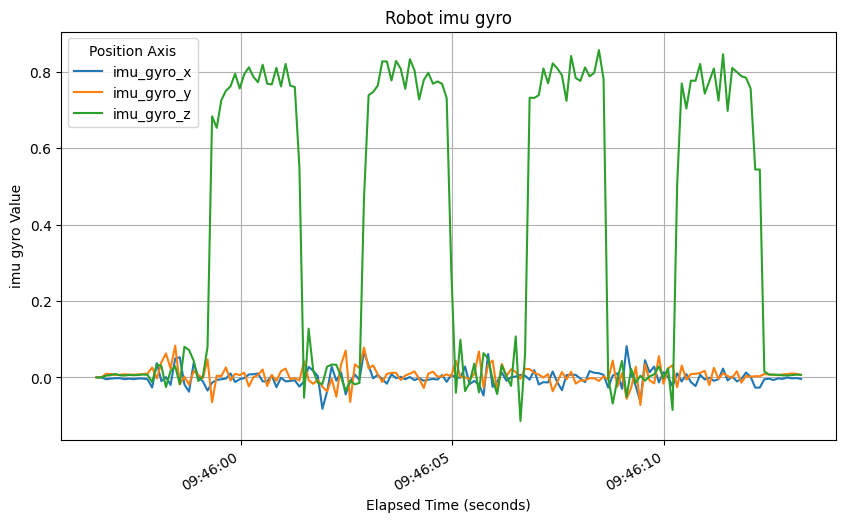

In [5]:
imu_gyro_cols = ['imu_gyro_x', 'imu_gyro_y', 'imu_gyro_z']
plt.figure(figsize=(10, 6))
df.plot(x='timestamp', y=imu_gyro_cols, ax=plt.gca())
plt.title('Robot imu gyro')
plt.xlabel('Elapsed Time (seconds)')
plt.ylabel('imu gyro Value')
plt.grid(True)
plt.legend(title='Position Axis')
plt.show()

# esc
- angle มุม หรือ ทิศทาง มอเตอร์ที่ใช้ในการบังคับทิศทาง แสดงทิศทางการหมุนหรือทิศทางการวางตัวของมอเตอร์
- esc_angle_0 มุม หรือ ทิศทาง ของมอเตอร์ตัวแรก
- esc_angle_1 มุม หรือ ทิศทาง ของมอเตอร์ตัวที่สอง

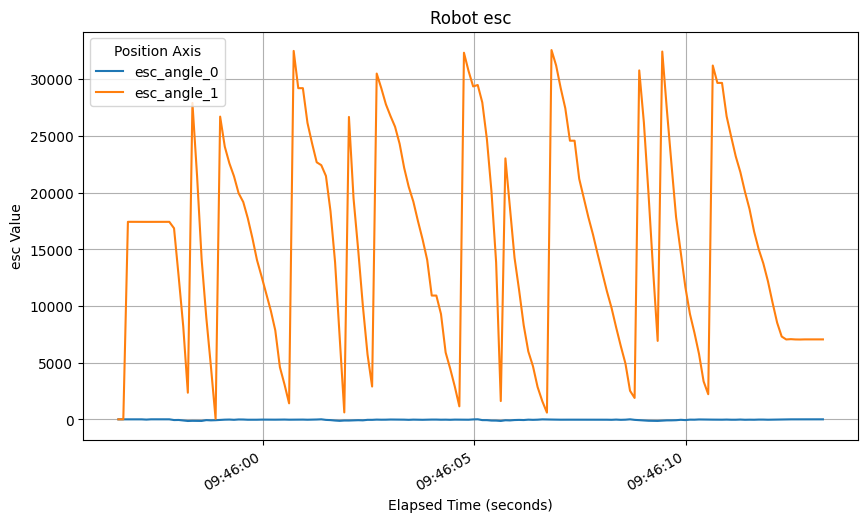

In [10]:
esc_cols = [ 'esc_angle_0', 'esc_angle_1']
plt.figure(figsize=(10, 6))
df.plot(x='timestamp', y=esc_cols, ax=plt.gca())
plt.title('Robot esc')
plt.xlabel('Elapsed Time (seconds)')
plt.ylabel('esc Value')
plt.grid(True)
plt.legend(title='Position Axis')
plt.show()

# esc
- angle มุม หรือ ทิศทาง มอเตอร์ที่ใช้ในการบังคับทิศทาง แสดงทิศทางการหมุนหรือทิศทางการวางตัวของมอเตอร์
- esc_speed_0 ความเร็วมอเตอร์ตัวแรก
- esc_speed_1 ความเร็วมอเตอร์ตัวที่สอง

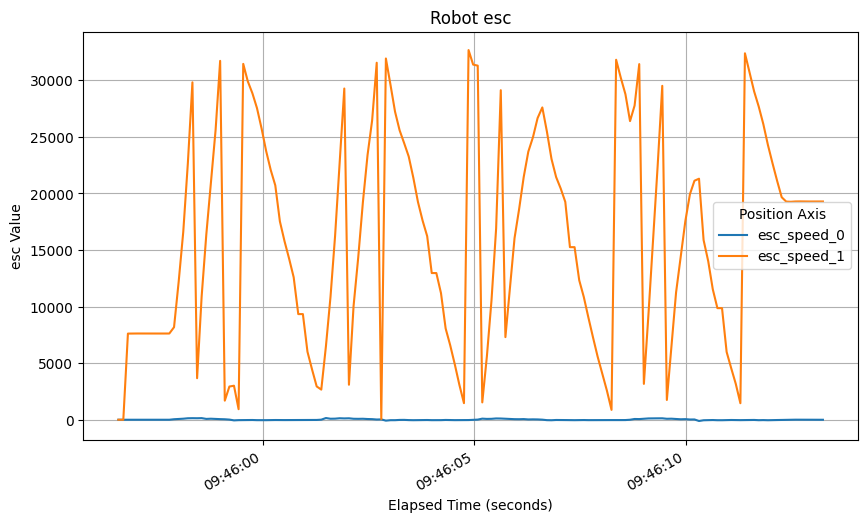

In [9]:
esc_cols = ['esc_speed_0', 'esc_speed_1']
plt.figure(figsize=(10, 6))
df.plot(x='timestamp', y=esc_cols, ax=plt.gca())
plt.title('Robot esc')
plt.xlabel('Elapsed Time (seconds)')
plt.ylabel('esc Value')
plt.grid(True)
plt.legend(title='Position Axis')
plt.show()

# status
เป็นค่าบงบอกว่า หุ่นยนต์เราเคลื่อนที่หรือหยุดนิ่ง ถ้ากราฟขึ้นแสดงว่าเคลื่อนที่ แต่ถ้ากราฟลดลงถึง 0 หรือ คงที่ ที่ 0 หมายถึงหยุดนิ่ง

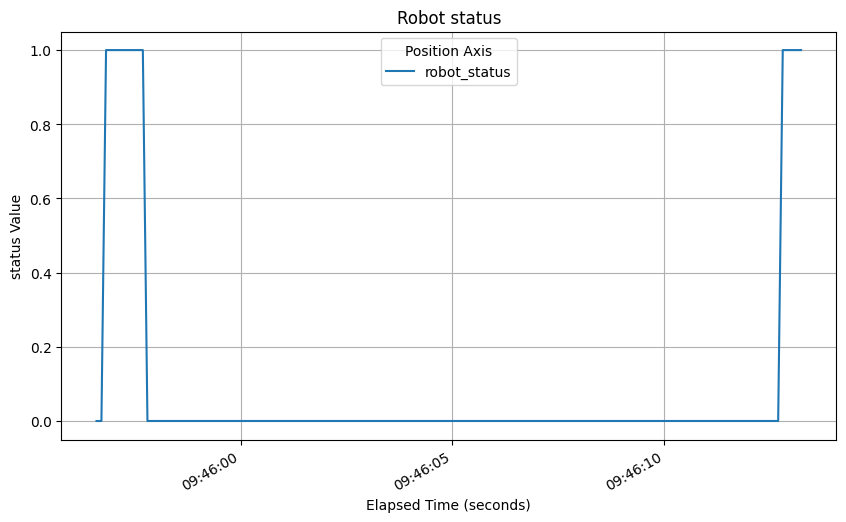

In [8]:
robot_status_col = ['robot_status']
plt.figure(figsize=(10, 6))
df.plot(x='timestamp', y=robot_status_col, ax=plt.gca())
plt.title('Robot status')
plt.xlabel('Elapsed Time (seconds)')
plt.ylabel('status Value')
plt.grid(True)
plt.legend(title='Position Axis')
plt.show()